<a href="https://colab.research.google.com/github/porori1224/2024_Chosun_osp_Deepfake-detection-Challenge/blob/main/KMS_Try_Code/After_2nd_Mentoring_%EC%86%8D%EB%8F%84_%EA%B0%9C%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import os
# check the current path
print(os.getcwd()) # /content

# You should copy the path : 왼쪽 폴더에서 오른쪽 버튼 후 경로복사
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW')

print(os.getcwd()) # path has been changed

/content
/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW


In [4]:
!pip install retina-face

In [5]:
!pip install torch torchvision torchaudio

In [6]:
# 필요시 설치
!pip install scikit-learn matplotlib

In [7]:
!pip install timm

In [8]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(df[["filename", "label", "split", "original"]].head(10))

         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4


In [9]:
# JSON 파일 로드 확인
print(f"Metadata loaded: {len(metadata)} records")
print(list(metadata.keys())[:5])  # JSON 데이터 키 확인

# 데이터프레임 형식 확인
print(df.head())

# 필터링 조건 확인
filtered_df = df[df["filename"].str.startswith(("00"))]
print(f"Filtered DataFrame size after filter: {len(filtered_df)}")
print(filtered_df.head())

Metadata loaded: 1334 records
['owxbbpjpch.mp4', 'vpmyeepbep.mp4', 'fzvpbrzssi.mp4', 'htorvhbcae.mp4', 'fckxaqjbxk.mp4']
         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
Filtered DataFrame size after filter: 0
Empty DataFrame
Columns: [filename, label, split, original]
Index: []


In [ ]:
import os
import pandas as pd
import json

# JSON 파일 경로 (dfdc_train_part_0 사용)
json_file = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(f"Total data size: {len(df)}")
print(df[["filename", "label", "split", "original"]].head(10))

# 비디오 파일 경로 생성 (dfdc_train_part_0 경로)
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/00~02/dfdc_train_part_0"
df["filepath"] = df["filename"].apply(lambda x: os.path.join(base_dir, x))

# 데이터 크기 확인
print(f"Filtered DataFrame size: {len(df)}")
print(df["label"].value_counts())  # 각 클래스별 데이터 수 확인

# 데이터 분리 (80% Train + Validation, 20% Test)
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df["label"])

# 분리된 데이터 크기 확인
print(f"Train DataFrame size: {len(train_df)}")
print(f"Validation DataFrame size: {len(val_df)}")
print(f"Test DataFrame size: {len(test_df)}")

# CSV 파일로 저장
private_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW"
os.makedirs(private_dir, exist_ok=True)

train_csv_path = os.path.join(private_dir, "train_split00.csv")
val_csv_path = os.path.join(private_dir, "val_split00.csv")
test_csv_path = os.path.join(private_dir, "test_split00.csv")

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Train CSV saved to: {train_csv_path}")
print(f"Validation CSV saved to: {val_csv_path}")
print(f"Test CSV saved to: {test_csv_path}")

Total data size: 1334
         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4
Filtered DataFrame size: 1334
label
0    1248
1      86
Name: count, dtype: int64
Train DataFrame size: 853
Validation DataFrame size: 214
Test DataFrame size: 267
Train CSV saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/train_split00.csv
Validation CSV saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/val_split00.csv
Test CSV saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/test_split00.csv


In [10]:
import pandas as pd
from sklearn.utils import resample

# 기존 데이터프레임 로드 (예: df)
fake_df = df[df['label'] == 0]
real_df = df[df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Fake와 Real 데이터를 결합
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 업데이트된 데이터 크기 출력
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

Balanced dataset size: 172
label
1    86
0    86
Name: count, dtype: int64


In [11]:
import os
import pandas as pd
import json
import cv2
from retinaface import RetinaFace
from multiprocessing import Pool
from torchvision import transforms
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle

# 경로 설정
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW"
input_dir = os.path.join(base_dir, "00~01/dfdc_train_part_0")
output_dir = os.path.join(base_dir, "processed_videos00")
os.makedirs(output_dir, exist_ok=True)

# JSON 파일 경로
json_file = os.path.join(input_dir, "metadata.json")

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터 균형 조정
fake_df = df[df["label"] == 0]
real_df = df[df["label"] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 비디오 파일 경로 생성
balanced_df["filepath"] = balanced_df["filename"].apply(lambda x: os.path.join(input_dir, x))

# 데이터 크기 확인
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df["label"].value_counts())  # 각 클래스별 데이터 수 확인

# 데이터 분리 (80% Train + Validation, 20% Test)
train_val_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df["label"])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df["label"])

# 분리된 데이터 크기 확인
print(f"Train DataFrame size: {len(train_df)}")
print(f"Validation DataFrame size: {len(val_df)}")
print(f"Test DataFrame size: {len(test_df)}")

# Pickle 저장 경로
train_pickle_path = os.path.join(base_dir, "train_split00.pkl")
val_pickle_path = os.path.join(base_dir, "val_split00.pkl")
test_pickle_path = os.path.join(base_dir, "test_split00.pkl")

# Pickle로 저장
with open(train_pickle_path, "wb") as f:
    pickle.dump(train_df, f)
with open(val_pickle_path, "wb") as f:
    pickle.dump(val_df, f)
with open(test_pickle_path, "wb") as f:
    pickle.dump(test_df, f)

print(f"Train data saved to: {train_pickle_path}")
print(f"Validation data saved to: {val_pickle_path}")
print(f"Test data saved to: {test_pickle_path}")

# 비디오 처리 함수
skipped_videos = set()  # 중복 방지
data_augment = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

def process_video(video_info):
    video_path, output_path = video_info
    try:
        # 비디오 열기
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Skipping invalid video: {video_path}")
            skipped_videos.add(video_path)
            return None

        # 프레임 읽기
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        mid_frame_idx = frame_count // 2
        random_frame_idx = random.randint(0, frame_count - 1)
        selected_frames = [mid_frame_idx, random_frame_idx]

        frames = []
        for idx in range(frame_count):
            ret, frame = cap.read()
            if not ret:
                break
            if idx in selected_frames:
                frames.append(frame)
        cap.release()

        if not frames:
            print(f"No frames selected: {video_path}")
            skipped_videos.add(video_path)
            return None

        # 얼굴 감지 및 데이터 증강
        for frame in frames:
            resized_frame = cv2.resize(frame, (160, 90))  # 해상도 축소
            faces = RetinaFace.detect_faces(resized_frame)
            if isinstance(faces, dict) and faces:
                bbox = list(faces.values())[0]["facial_area"]
                cropped_face = resized_frame[bbox[1]:bbox[3], bbox[0]:bbox[2]]

                # 데이터 증강
                augmented_face = data_augment(cropped_face)

                # 이미지 저장
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                augmented_image = transforms.ToPILImage()(augmented_face)
                augmented_image.save(output_path)
                print(f"Processed and saved: {output_path}")
                return output_path

        print(f"Skipping video without detectable faces: {video_path}")
        skipped_videos.add(video_path)
        return None

    except Exception as e:
        print(f"Error processing {video_path}: {e}")
        skipped_videos.add(video_path)
        return None

# 비디오 정보 리스트 생성
video_info_list = [
    (os.path.join(input_dir, filename), os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_processed.jpg"))
    for filename in os.listdir(input_dir) if filename.endswith(".mp4")
]

# 병렬 처리 함수
def process_videos_in_parallel(video_info_list, num_processes=os.cpu_count()):
    with Pool(processes=num_processes) as pool:
        results = pool.map(process_video, video_info_list)
    return results

# 실행
if __name__ == "__main__":
    print("Starting optimized video processing...")
    processed_files = process_videos_in_parallel(video_info_list, num_processes=4)
    print("Processing complete.")

    # 스킵된 비디오 저장
    skipped_videos_path = os.path.join(base_dir, "skipped_videos00.txt")
    with open(skipped_videos_path, "w") as f:
        for video in skipped_videos:
            f.write(f"{video}\n")
    print(f"Skipped videos saved to: {skipped_videos_path}")

Balanced dataset size: 172
label
1    86
0    86
Name: count, dtype: int64
Train DataFrame size: 109
Validation DataFrame size: 28
Test DataFrame size: 35
Train data saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/train_split00.pkl
Validation data saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/val_split00.pkl
Test data saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/test_split00.pkl
Starting optimized video processing...
24-12-02 07:16:29 - Directory /root/.deepface created
24-12-02 07:16:29 - Directory /root/.deepface/weights created
24-12-02 07:16:29 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
24-12-02 07:16:30 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
24-12-02 07:16:30 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/downlo

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
  0%|          | 0.00/119M [00:00<?, ?B/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
  0%|          | 0.00/119M [00:00<?, ?B/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
Downloading...
  0%|          | 0.00/119M [00:00<?, ?B/s] https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 311MB/s] 
100%|██████████| 119M/119M [00:00<00:00, 292MB/s]
100%|██████████| 119M/119M [00:00<00:00, 296MB/s] 
100%|██████████| 119M/119M [00:00<00:00, 263MB/s]


Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/yptchajnvb_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/yajhwipypq_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/xewwsdhdro_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/bmhghysucl_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/jphmkhpoeb_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/culaevxduf_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/itwvssoevj_processed.jpgProcessed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00/udxqbhgvvx_processed.jpg

Skipping video without detectable faces: /content/gdrive/MyDrive/Colab N

In [12]:
# processed_dir 변수 정의
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00"

# processed_dir 내 파일 가져오기
processed_files = set(os.listdir(processed_dir))

# 파일 이름 매핑 함수 정의
def match_filename(filename, processed_files):
    base_filename = os.path.splitext(filename)[0]
    processed_filename = f"{base_filename}_processed.jpg"
    return processed_filename if processed_filename in processed_files else None

# Train 데이터 파일명과 라벨 매핑 생성
train_labels = {
    match_filename(filename, processed_files): label
    for filename, label in zip(train_df["filename"], train_df["label"])
    if match_filename(filename, processed_files) is not None
}

# Test 데이터 파일명과 라벨 매핑 생성
test_labels = {
    match_filename(filename, processed_files): label
    for filename, label in zip(test_df["filename"], test_df["label"])
    if match_filename(filename, processed_files) is not None
}

# 결과 확인
print(f"Train Labels Count: {len(train_labels)}")
print(f"Test Labels Count: {len(test_labels)}")


Train Labels Count: 65
Test Labels Count: 23


In [13]:
# train_labels와 test_labels의 개수 확인
print(f"Train Labels Count: {len(train_labels)}")
print(f"Test Labels Count: {len(test_labels)}")

# train_labels의 키 출력
if len(train_labels) == 0:
    print("Train Labels is empty!")
else:
    print(f"Sample Train Label: {list(train_labels.keys())[:5]}")

# test_labels의 키 출력
if len(test_labels) == 0:
    print("Test Labels is empty!")
else:
    print(f"Sample Test Label: {list(test_labels.keys())[:5]}")

Train Labels Count: 65
Test Labels Count: 23
Sample Train Label: ['xnfrhixfym_processed.jpg', 'hasjjkoygr_processed.jpg', 'fopjiyxiqd_processed.jpg', 'dvrnrzlqdo_processed.jpg', 'gyosvoeamf_processed.jpg']
Sample Test Label: ['heiyoojifp_processed.jpg', 'yeouperxzc_processed.jpg', 'sylnrepacf_processed.jpg', 'xmkwsnuzyq_processed.jpg', 'nwvloufjty_processed.jpg']


In [14]:
# train_df와 test_df 데이터 확인
print("Train DataFrame Sample:")
print(train_df.head())

print("\nTest DataFrame Sample:")
print(test_df.head())

Train DataFrame Sample:
           filename  label  split        original  \
165  xnfrhixfym.mp4      0  train  fsaronfupy.mp4   
104  hasjjkoygr.mp4      0  train  fopjiyxiqd.mp4   
107  runmncglnj.mp4      0  train  gnmmhlbzge.mp4   
99   fopjiyxiqd.mp4      1  train             NaN   
73   vpmyeepbep.mp4      1  train             NaN   

                                              filepath  
165  /content/gdrive/MyDrive/Colab Notebooks/KMS_OS...  
104  /content/gdrive/MyDrive/Colab Notebooks/KMS_OS...  
107  /content/gdrive/MyDrive/Colab Notebooks/KMS_OS...  
99   /content/gdrive/MyDrive/Colab Notebooks/KMS_OS...  
73   /content/gdrive/MyDrive/Colab Notebooks/KMS_OS...  

Test DataFrame Sample:
           filename  label  split        original  \
77   heiyoojifp.mp4      1  train             NaN   
2    haxnhfvqvs.mp4      0  train  xkfliqnmwt.mp4   
4    yeouperxzc.mp4      0  train  vmxfwxgdei.mp4   
156  qloyrbpobv.mp4      0  train  vpmyeepbep.mp4   
115  sylnrepacf.mp4      1

Train Labels Count: 77
Training Ensemble Model with Visualization...
Ensemble Epoch 1/10 - Train Loss: 0.7258
Ensemble Epoch 2/10 - Train Loss: 0.7028
Ensemble Epoch 3/10 - Train Loss: 0.6932
Ensemble Epoch 4/10 - Train Loss: 0.6859
Ensemble Epoch 5/10 - Train Loss: 0.6808
Ensemble Epoch 6/10 - Train Loss: 0.6773
Ensemble Epoch 7/10 - Train Loss: 0.6705
Ensemble Epoch 8/10 - Train Loss: 0.6631
Ensemble Epoch 9/10 - Train Loss: 0.6544
Ensemble Epoch 10/10 - Train Loss: 0.6465


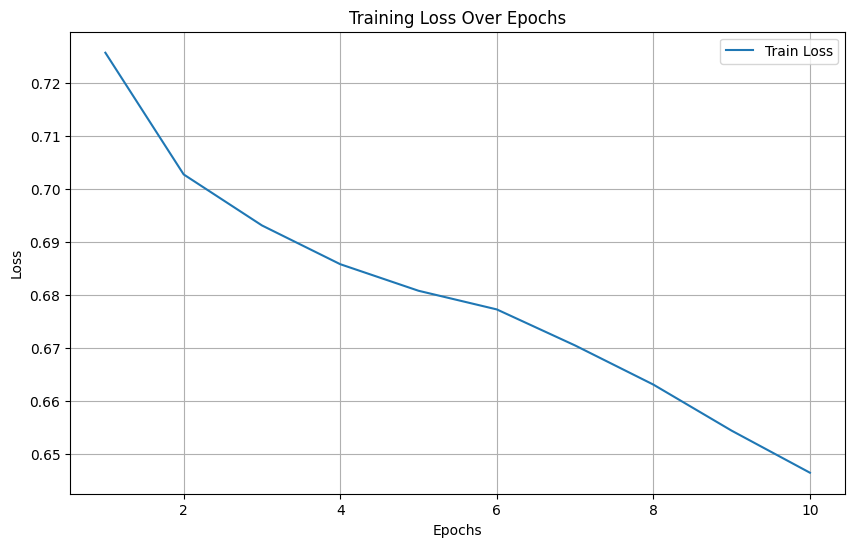

In [19]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from timm import create_model
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None, apply_retinaface=False):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())
        self.apply_retinaface = apply_retinaface

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 데이터 경로 및 CSV 파일 설정
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos00"
train_csv = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/train_split00.csv"

# CSV 파일 로드
train_df = pd.read_csv(train_csv)

# Fake와 Real 데이터 균형 맞추기
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_train_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 파일명과 라벨 매핑 생성 함수
def create_labels(df, processed_files):
    labels = {}
    for filename, label in zip(df["filename"], df["label"]):
        base_filename = os.path.splitext(filename)[0]
        processed_filename = f"{base_filename}_processed.jpg"
        if processed_filename in processed_files:
            labels[processed_filename] = label
    return labels

# processed_dir 내 파일 가져오기
processed_files = set(os.listdir(processed_dir))
train_labels = create_labels(balanced_train_df, processed_files)

# 데이터 검증
print(f"Train Labels Count: {len(train_labels)}")

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, train_labels, transform=transform, apply_retinaface=True)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

# EfficientNet-B0 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        x = self.fc(x)
        return x

# ConvNextTiny 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        x = self.fc(x)
        return x

# EfficientNet-B0 및 ConvNextTiny 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# EfficientNet-B0 + ConvNextTiny 앙상블 모델 정의
class EnsembleModel(nn.Module):
    def __init__(self, model1, model2, num_classes=1):
        super(EnsembleModel, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.fc = nn.Linear(num_classes * 2, num_classes)

    def forward(self, x):
        output1 = self.model1(x)
        output2 = self.model2(x)
        combined = torch.cat((output1, output2), dim=1)
        return self.fc(combined)

ensemble_model = EnsembleModel(efficientnet_b0, convnext_tiny)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_ensemble = optim.Adam(ensemble_model.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습 및 시각화 함수
def train_ensemble_with_visualization(model, optimizer, train_loader, num_epochs):
    train_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            optimizer.zero_grad()
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        print(f"Ensemble Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

    # 학습 손실 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# 학습 실행 및 시각화
print("Training Ensemble Model with Visualization...")
ensemble_model = ensemble_model.cuda()
train_ensemble_with_visualization(ensemble_model, optimizer_ensemble, train_loader, num_epochs=10)

In [20]:
# Test 데이터셋 정의
test_dataset = ProcessedDataset(
    processed_dir,
    test_labels,  # Test 데이터의 라벨
    transform=transform,  # 이미지 전처리
    apply_retinaface=True
)

# Test DataLoader 정의
test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False
)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 실제 라벨 리스트 및 모델 예측 리스트 초기화
y_true = []
y_pred = []

# 모델을 평가 모드로 전환
ensemble_model.eval()

# Test 데이터셋을 사용한 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ensemble_model.to(device)

with torch.no_grad():
    for images, labels in test_loader:
        # 데이터를 GPU/CPU로 이동
        images = images.to(device)
        labels = labels.to(device)

        # 실제 라벨 저장
        y_true.extend(labels.cpu().numpy())  # CPU로 이동하여 저장

        # 모델 예측
        outputs = ensemble_model(images)
        preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)
        y_pred.extend(preds.flatten().tolist())

# 성능 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

# 결과 출력
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 78.26%
Precision: 90.91%
Recall: 71.43%
F1 Score: 80.00%


In [25]:
# Test 데이터 경로 및 pkl 파일 설정
test_pkl = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/test_split00.pkl"

# pkl 파일 로드
test_df = pd.read_pickle(test_pkl)

# Test 데이터셋 라벨 생성
test_labels = create_labels(test_df, processed_files)

# Test 데이터셋 및 DataLoader 정의
test_dataset = ProcessedDataset(
    processed_dir,
    test_labels,
    transform=transform,
    apply_retinaface=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=os.cpu_count(),  # CPU 코어 수 활용
    pin_memory=True  # GPU 사용 시 속도 향상
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_ensemble_model(model, test_loader):
    model.eval()  # 평가 모드
    y_true = []
    y_pred = []

    # GPU/CPU 설정
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with torch.no_grad():
        for images, labels in test_loader:
            # 데이터를 GPU/CPU로 이동
            images = images.to(device)
            labels = labels.to(device)

            # 모델 예측
            outputs = model(images)
            preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)

            # 실제 라벨 및 예측 라벨 저장
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.flatten().tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # 결과 출력
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    print(f"Test Precision: {precision*100:.2f}%")
    print(f"Test Recall: {recall*100:.2f}%")
    print(f"Test F1 Score: {f1*100:.2f}%")

# Test 데이터로 모델 평가
print("Evaluating Ensemble Model on Test Data...")
evaluate_ensemble_model(ensemble_model, test_loader)

Evaluating Ensemble Model on Test Data...
Test Accuracy: 78.26%
Test Precision: 90.91%
Test Recall: 71.43%
Test F1 Score: 80.00%
